<a href="https://colab.research.google.com/github/Bborub/bk-bridge-pedestrian/blob/main/Stox_25Aug23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From: https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/

In [ ]:
!pip install yfinance pandas matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ticker_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'JPM', 'V', 'JNJ', 'PG', 'XOM', 'BAC' , 'NVDA' , 'MMM']

In [4]:
start_date = '2010-01-01'
end_date = '2023-08-24'

data = yf.download(ticker_symbols, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  12 of 12 completed


In [5]:
daily_returns = data.pct_change()

In [6]:
advancing_stocks = (daily_returns > 0).sum(axis=1)
declining_stocks = (daily_returns < 0).sum(axis=1)

In [7]:
cumulative_advancing = advancing_stocks.cumsum()
cumulative_declining = declining_stocks.cumsum()

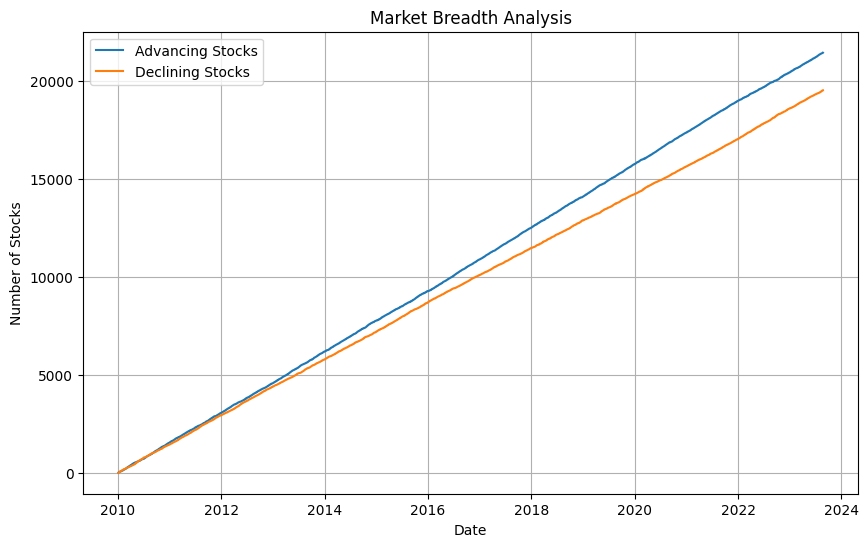

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.legend()
plt.grid(True)
plt.show()

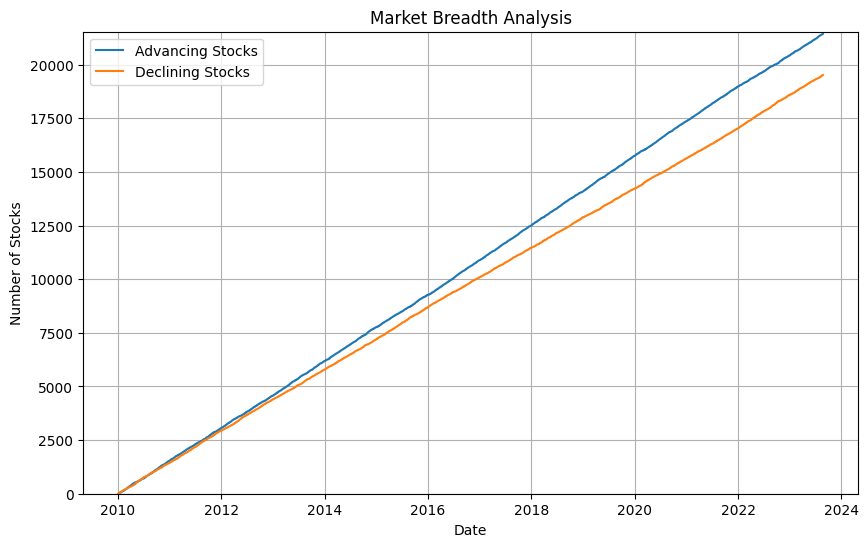

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.ylim(0, max(cumulative_advancing.max(), cumulative_declining.max()) + 100)  # Adjust y-axis limits
plt.legend()
plt.grid(True)
plt.show()

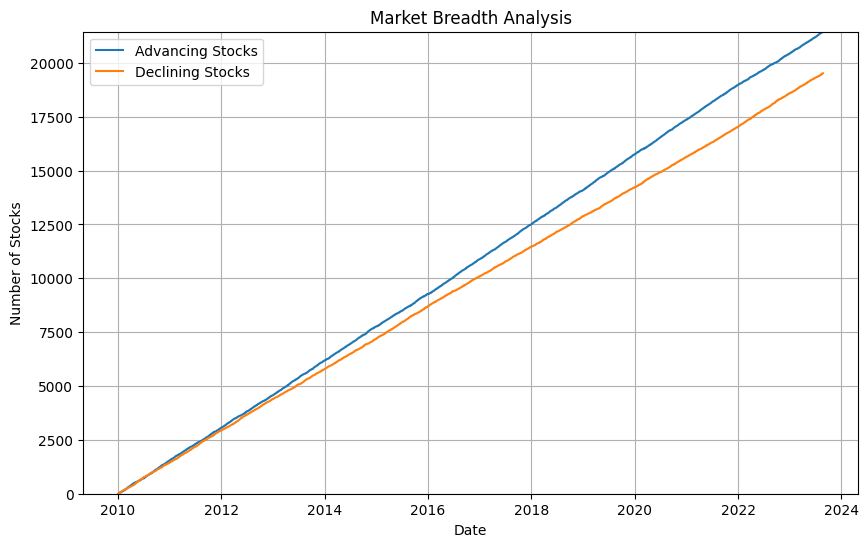

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.ylim(0, max(cumulative_advancing.max(), cumulative_declining.max()) + 10)  # Adjust y-axis limits
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.ylim(0, 12)  # Set y-axis limits to 0 and 12
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.ylim(0, max(cumulative_advancing.max(), cumulative_declining.max()) + 10)  # Adjust y-axis limits
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_advancing.index, cumulative_advancing, label='Advancing Stocks')
plt.plot(cumulative_declining.index, cumulative_declining, label='Declining Stocks')
plt.title('Market Breadth Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.ylim(0, 12)  # Set y-axis limits to 0 and 12
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import requests

# Set the FRED API URL and the LEI series code
url = "https://api.stlouisfed.org/fred/series/observations"
lei_series_code = "USSLIND"

# Set your FRED API key
api_key = "0037ed8715a26518c27499dabcbc2fa9"

# Set the desired date range for the LEI data
start_date = "2018-01-01"
end_date = "2023-08-31"

# Build the API request URL
params = {
    "series_id": lei_series_code,
    "api_key": api_key,
    "observation_start": start_date,
    "observation_end": end_date,
    "file_type": "json"
}
response = requests.get(url, params=params)

# Parse the JSON response
data = response.json()
observations = data["observations"]

# Convert the data to a pandas DataFrame
lei_data = pd.DataFrame(observations)
lei_data["date"] = pd.to_datetime(lei_data["date"])
lei_data["value"] = pd.to_numeric(lei_data["value"])
lei_data.set_index("date", inplace=True)

# Print the LEI data
print(lei_data)

In [ ]:
import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

!pip install yfinance

import yfinance as yf

%matplotlib inline

In [18]:
start = "2013-01-01"
end = '2023-8-24'
msft = yf.download('MSFT',start,end)
aapl = yf.download('AAPL',start,end)
amzn = yf.download('AMZN',start,end)
nvda=yf.download('NVDA', start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


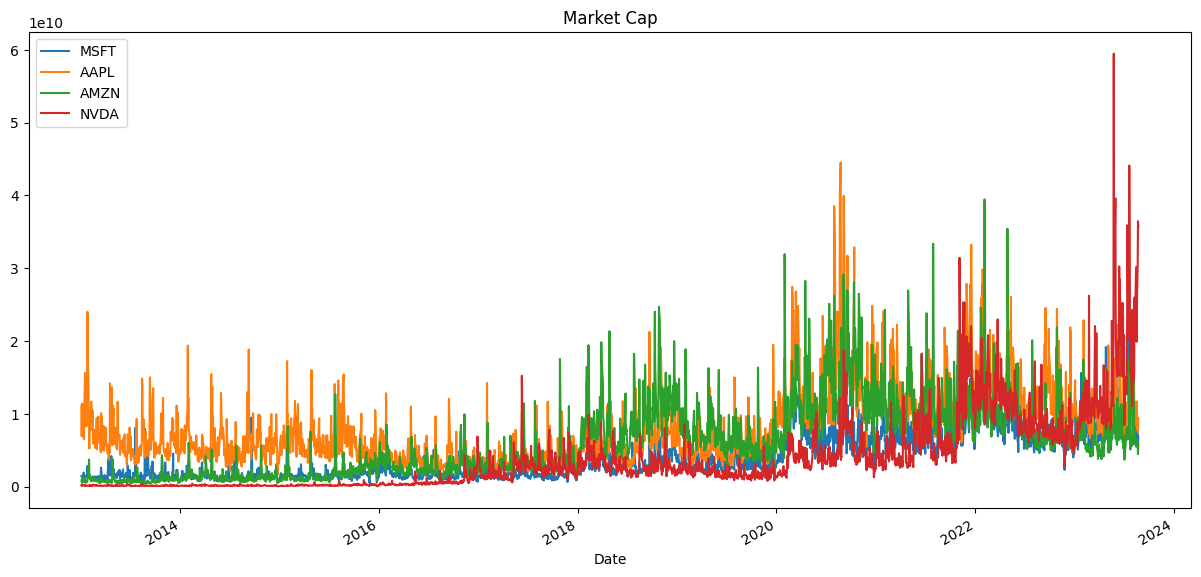

In [19]:
#Market Capitalization
msft['MarktCap'] = msft['Open'] * msft['Volume']
aapl['MarktCap'] = aapl['Open'] * aapl['Volume']
amzn['MarktCap'] = amzn['Open'] * amzn['Volume']
nvda['MarktCap']=nvda['Open']*nvda['Volume']
msft['MarktCap'].plot(label = 'MSFT', figsize = (15,7))
aapl['MarktCap'].plot(label = 'AAPL')
amzn['MarktCap'].plot(label = 'AMZN')
nvda['MarktCap'].plot(label = 'NVDA')
plt.title('Market Cap')
plt.legend()

In [ ]:
#Volatility
msft['returns'] = (msft['Close']/msft['Close'].shift(1)) -1
aapl['returns'] = (aapl['Close']/aapl['Close'].shift(1))-1
amzn['returns'] = (amzn['Close']/amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close']/nvda['Close'].shift(1)) - 1
msft['returns'].hist(bins = 100, label = 'MSFT', alpha = 0.5, figsize = (15,7))
aapl['returns'].hist(bins = 100, label = 'AAPL', alpha = 0.5)
amzn['returns'].hist(bins = 100, label = 'AMZN', alpha = 0.5)
nvda['returns'].hist(bins = 100, label = 'NVDA', alpha = 0.5)
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Plot the histograms with distinct colors
plt.figure(figsize=(15, 7))
msft['returns'].hist(bins=100, label='MSFT', alpha=0.5, color='blue')
aapl['returns'].hist(bins=100, label='AAPL', alpha=0.5, color='green')
amzn['returns'].hist(bins=100, label='AMZN', alpha=0.5, color='red')
nvda['returns'].hist(bins=100, label='NVDA', alpha=0.5, color='orange')

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

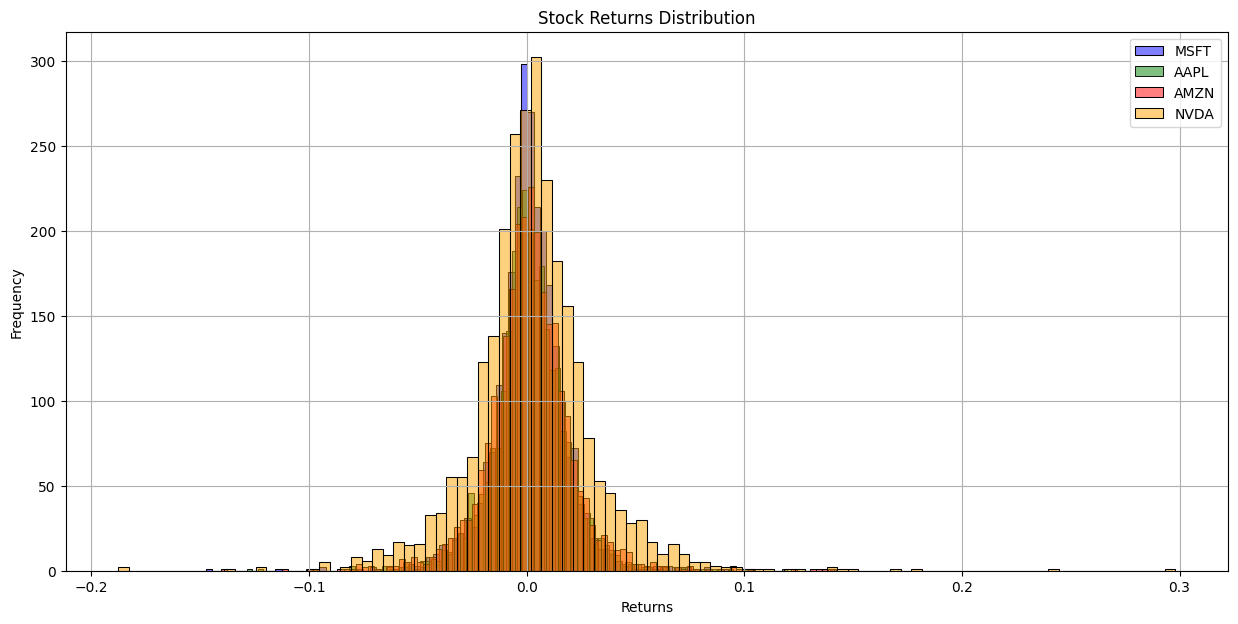

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with distinct colors
colors = ['blue', 'green', 'red', 'orange']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=msft, x='returns', bins=100, label='MSFT', alpha=0.5, color=colors[0])
sns.histplot(data=aapl, x='returns', bins=100, label='AAPL', alpha=0.5, color=colors[1])
sns.histplot(data=amzn, x='returns', bins=100, label='AMZN', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [ ]:
start = "2013-01-01"
end = '2023-8-24'
amd = yf.download('AMD',start,end)
avgo = yf.download('AVGO',start,end)
intc = yf.download('INTC',start,end)
nvda=yf.download('NVDA', start,end)

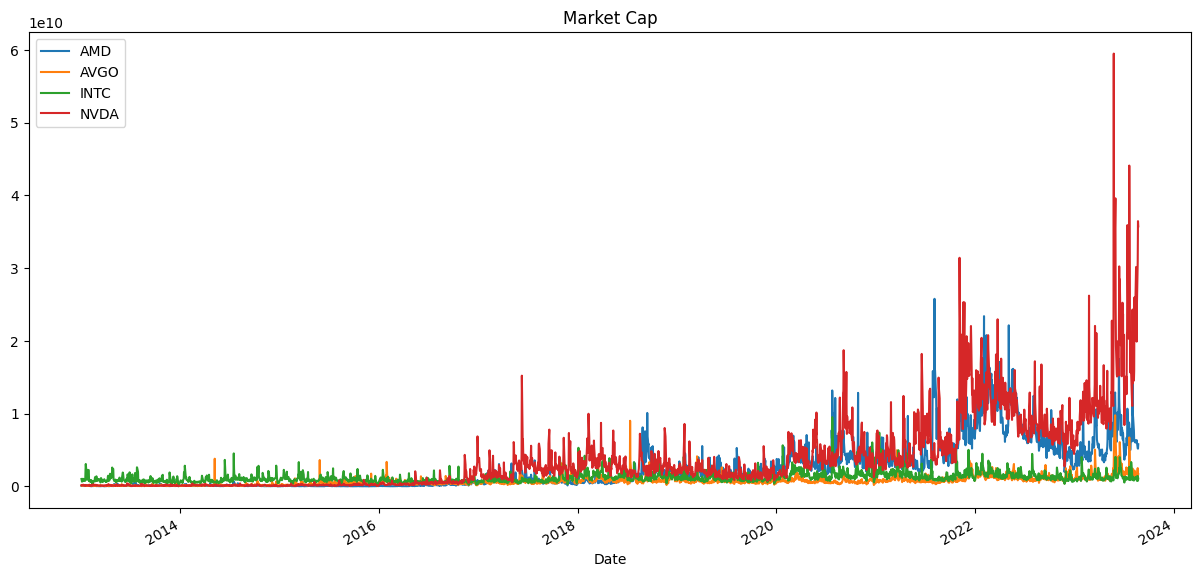

In [24]:
#Market Capitalization
amd['MarktCap'] = amd['Open'] * amd['Volume']
avgo['MarktCap'] = avgo['Open'] * avgo['Volume']
intc['MarktCap'] = intc['Open'] * intc['Volume']
nvda['MarktCap']=nvda['Open']*nvda['Volume']
amd['MarktCap'].plot(label = 'AMD', figsize = (15,7))
avgo['MarktCap'].plot(label = 'AVGO')
intc['MarktCap'].plot(label = 'INTC')
nvda['MarktCap'].plot(label = 'NVDA')
plt.title('Market Cap')
plt.legend()

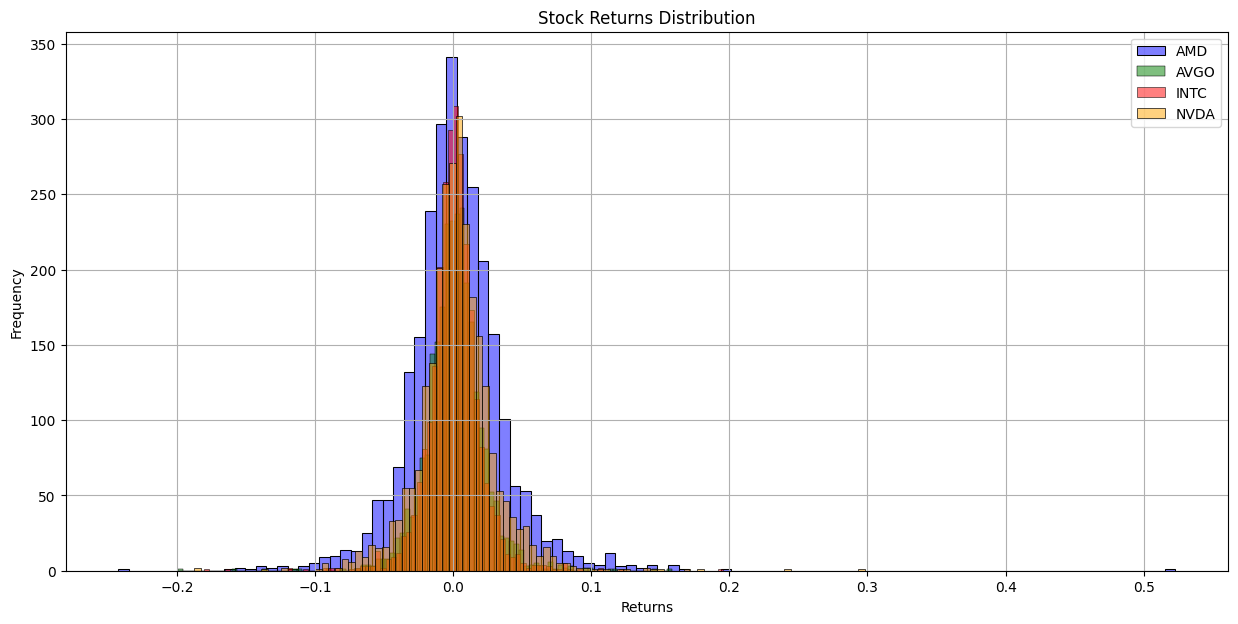

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
amd['returns'] = (amd['Close'] / amd['Close'].shift(1)) - 1
avgo['returns'] = (avgo['Close'] / avgo['Close'].shift(1)) - 1
intc['returns'] = (intc['Close'] / intc['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with distinct colors
colors = ['blue', 'green', 'red', 'orange']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=amd, x='returns', bins=100, label='AMD', alpha=0.5, color=colors[0])
sns.histplot(data=avgo, x='returns', bins=100, label='AVGO', alpha=0.5, color=colors[1])
sns.histplot(data=intc, x='returns', bins=100, label='INTC', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with more distinctive colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=msft, x='returns', bins=100, label='MSFT', alpha=0.5, color=colors[0])
sns.histplot(data=aapl, x='returns', bins=100, label='AAPL', alpha=0.5, color=colors[1])
sns.histplot(data=amzn, x='returns', bins=100, label='AMZN', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with more distinctive colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=msft, x='returns', bins=100, label='MSFT', alpha=0.5, color=colors[0])
sns.histplot(data=aapl, x='returns', bins=100, label='AAPL', alpha=0.5, color=colors[1])
sns.histplot(data=amzn, x='returns', bins=100, label='AMZN', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with more distinctive colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=msft, x='returns', bins=100, label='MSFT', alpha=0.5, color=colors[0])
sns.histplot(data=aapl, x='returns', bins=100, label='AAPL', alpha=0.5, color=colors[1])
sns.histplot(data=amzn, x='returns', bins=100, label='AMZN', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
msft['returns'] = (msft['Close'] / msft['Close'].shift(1)) - 1
aapl['returns'] = (aapl['Close'] / aapl['Close'].shift(1)) - 1
amzn['returns'] = (amzn['Close'] / amzn['Close'].shift(1)) - 1
nvda['returns'] = (nvda['Close'] / nvda['Close'].shift(1)) - 1

# Define a custom color palette with more distinctive colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=msft, x='returns', bins=100, label='MSFT', alpha=0.5, color=colors[0])
sns.histplot(data=aapl, x='returns', bins=100, label='AAPL', alpha=0.5, color=colors[1])
sns.histplot(data=amzn, x='returns', bins=100, label='AMZN', alpha=0.5, color=colors[2])
sns.histplot(data=nvda, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()

In [31]:
start = "2020-01-01"
end = '2023-8-24'
amd2 = yf.download('AMD',start,end)
avgo2 = yf.download('AVGO',start,end)
intc2 = yf.download('INTC',start,end)
nvda2=yf.download('NVDA', start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already defined the 'msft', 'aapl', 'amzn', and 'nvda' DataFrames

# Calculate the returns for each stock
amd2['returns'] = (amd2['Close'] / amd2['Close'].shift(1)) - 1
avgo2['returns'] = (avgo2['Close'] / avgo2['Close'].shift(1)) - 1
intc2['returns'] = (intc2['Close'] / intc2['Close'].shift(1)) - 1
nvda2['returns'] = (nvda2['Close'] / nvda2['Close'].shift(1)) - 1

# Define a custom color palette with distinct colors
colors = ['blue', 'green', 'red', 'orange']

# Plot the histograms with the custom color palette
plt.figure(figsize=(15, 7))
sns.histplot(data=amd2, x='returns', bins=100, label='AMD', alpha=0.5, color=colors[0])
sns.histplot(data=avgo2, x='returns', bins=100, label='AVGO', alpha=0.5, color=colors[1])
sns.histplot(data=intc2, x='returns', bins=100, label='INTC', alpha=0.5, color=colors[2])
sns.histplot(data=nvda2, x='returns', bins=100, label='NVDA', alpha=0.5, color=colors[3])

plt.legend()
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Stock Returns Distribution')
plt.grid(True)
plt.show()